<a href="https://colab.research.google.com/github/naeabah/Twitter-Sentiment-Analysis-for-Covid-19-Vaccine./blob/main/Twitter%20Sentiment%20Analysis%20for%20Covid-19%20Vaccine..ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Twitter-Sentiment-Analysis-for-Covid-19-Vaccine

### Nehemiah Abah

In [ ]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
#Twitter API Crendentials
consumerKey = 'IomEAG1qTAYiqx5XRjNKFzDkJ'
consumerSecret = 'GIP3fFWCRAZOgGuBD9B1gA9vnln820H4NAw1r5q5dzaNBgbLN3'
accessToken = '275097268-lLCeRg0RgDwZX2WbWYgtG8GuXTHUTS2isiBGDl0o'
accessTokenSecret = 'JaNVOWAjRVwBBCImyc7QtcQ1lr81bcU2MrQsV4JmZ6JM4'

In [ ]:
#Create Authentication
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret)

#Set the access token and access token secret
authenticate.set_access_token(accessToken, accessTokenSecret)

#Create the API object while passing in the auth information
api= tweepy.API(authenticate, wait_on_rate_limit= True)

In [ ]:
search_term = '#Covid-19 vaccine -filter:retweets'
tweets = tweepy.Cursor(api.search, q=search_term, lang="en", since= '2021-01-01', tweet_mode='extended').items(4000)
#Store the twets in a variable and get full text 
all_tweets = [tweet.full_text for tweet in tweets]

In [ ]:
#Create Dataframe to Store the tweets with a column called tweets
df = pd.DataFrame(all_tweets, columns = ['Tweets'])
#Show the first 5 rows of Data
df.head(5)

,Tweets
0,@Glaven1994 1. Infected NZ MIQ security guard ...
1,"CDC: Nearly 80% of Teachers, School Staff, Chi..."
2,@MinorDub2021 @JO_PARRY__ART @pureangel40 @kat...
3,Out of 168 countries that have begun administe...
4,Disney World Opens COVID-19 Vaccine Site for W...


In [ ]:
#Create a function to clean the tweets
def cleanTwt(twt):
  twt = re.sub('#Covid-19 vaccine', 'covid-19 vaccine', twt) #Removes the "#" from covid-19 vaccine
  twt = re.sub('Covid-19 vaccine', 'covid-19 vaccine', twt) #Makes it lower case
  twt = re.sub('COVID-19 vaccine', 'covid-19 vaccine', twt)
  twt = re.sub('Covid19 vaccine', 'covid-19 vaccine', twt) #removes dash
  twt = re.sub('#[A-Za-z0-9]+', '', twt) # Removes any string with a 
  twt = re.sub('\\n', '', twt) #Removes the '\n' string
  twt = re.sub('https?:\/\/\S+','', twt) #Removes any hyperlinks
  return twt

In [ ]:
#Clean the tweets
df['Cleaned_Tweets'] = df['Tweets'].apply(cleanTwt)
#Show the dataset
df.head()


,Tweets,Cleaned_Tweets
0,@Glaven1994 1. Infected NZ MIQ security guard ...,@Glaven1994 1. Infected NZ MIQ security guard ...
1,"CDC: Nearly 80% of Teachers, School Staff, Chi...","CDC: Nearly 80% of Teachers, School Staff, Chi..."
2,@MinorDub2021 @JO_PARRY__ART @pureangel40 @kat...,@MinorDub2021 @JO_PARRY__ART @pureangel40 @kat...
3,Out of 168 countries that have begun administe...,Out of 168 countries that have begun administe...
4,Disney World Opens COVID-19 Vaccine Site for W...,Disney World Opens COVID-19 Vaccine Site for W...


In [ ]:
df.shape

(4000, 2)

In [ ]:
# Create function to get the subjectivity
def getSubjectivity(twt):
  return TextBlob(twt).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(twt):
  return TextBlob(twt).sentiment.polarity

#Create two new columns called 'subjectivity' & 'Polarity'
df['Subjectivity'] = df['Cleaned_Tweets'].apply(getSubjectivity)
df['Polarity'] = df ['Cleaned_Tweets'].apply(getPolarity)

#Show Data
df.head()

,Tweets,Cleaned_Tweets,Subjectivity,Polarity
0,@Glaven1994 1. Infected NZ MIQ security guard ...,@Glaven1994 1. Infected NZ MIQ security guard ...,0.000000,0.000000
1,"CDC: Nearly 80% of Teachers, School Staff, Chi...","CDC: Nearly 80% of Teachers, School Staff, Chi...",0.400000,-0.100000
2,@MinorDub2021 @JO_PARRY__ART @pureangel40 @kat...,@MinorDub2021 @JO_PARRY__ART @pureangel40 @kat...,0.540584,0.256494
3,Out of 168 countries that have begun administe...,Out of 168 countries that have begun administe...,0.000000,0.000000
4,Disney World Opens COVID-19 Vaccine Site for W...,Disney World Opens COVID-19 Vaccine Site for W...,0.000000,0.000000


In [ ]:
#Create a function to get the sentiment text
def getSentiment(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'
  

In [ ]:
# Create a column to store the text sentiment
df['Sentiment'] = df['Polarity'].apply(getSentiment)

#Show the data
df.head()

,Tweets,Cleaned_Tweets,Subjectivity,Polarity,Sentiment
0,@Glaven1994 1. Infected NZ MIQ security guard ...,@Glaven1994 1. Infected NZ MIQ security guard ...,0.000000,0.000000,Neutral
1,"CDC: Nearly 80% of Teachers, School Staff, Chi...","CDC: Nearly 80% of Teachers, School Staff, Chi...",0.400000,-0.100000,Negative
2,@MinorDub2021 @JO_PARRY__ART @pureangel40 @kat...,@MinorDub2021 @JO_PARRY__ART @pureangel40 @kat...,0.540584,0.256494,Positive
3,Out of 168 countries that have begun administe...,Out of 168 countries that have begun administe...,0.000000,0.000000,Neutral
4,Disney World Opens COVID-19 Vaccine Site for W...,Disney World Opens COVID-19 Vaccine Site for W...,0.000000,0.000000,Neutral


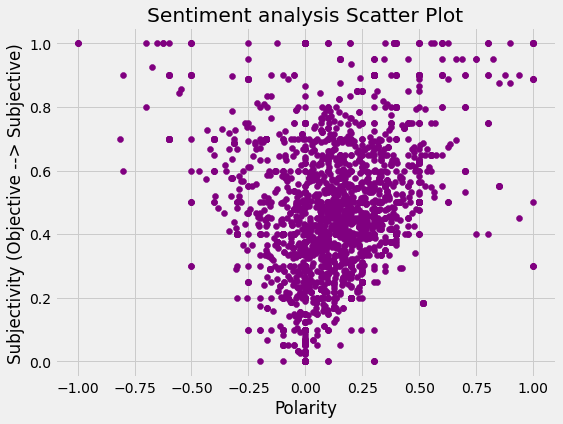

In [ ]:
#Create a scatter plot to show the subjectivity and the polarity
plt.figure(figsize =(8,6))
for i in range (0, df.shape[0]):
    plt.scatter(df['Polarity'][i], df ['Subjectivity'] [i], color = 'Purple')
plt.title ('Sentiment analysis Scatter Plot')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity (Objective --> Subjective)')
plt.show()

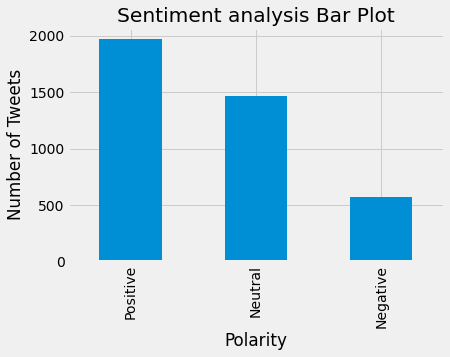

In [ ]:
#Create Bar chart to show the count of Positive, Neutral and Negative Sentiments
df['Sentiment'].value_counts().plot(kind='bar')
plt.title ('Sentiment analysis Bar Plot')
plt.xlabel('Polarity')
plt.ylabel('Number of Tweets')
plt.show()